<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch 20 Numerical Differentiation

## 20.1 Numerical Differentiation Problem Statement

A numerical grid is a set of points evenly dispered on the x axis for a functions entire domain. While the function may be continuous, it is only known at these discrete points (for example sensor readings where there is a delay for the sensor to relay information). Therefore there needs to be a way to approximate the derivative over a grid and determine its accuracy.

##20.2 Finite Difference Approximating Derivatives

The traditional definition for finding a derivative at a point a requires a continuous function. However since these functions by definition are not continuous the following methods are used to calculate low order functions

To find the slope at the value xj, there are three traditional equations

Forward Difference:

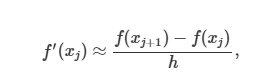

Backward difference:

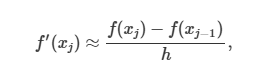

Central difference


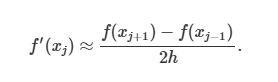

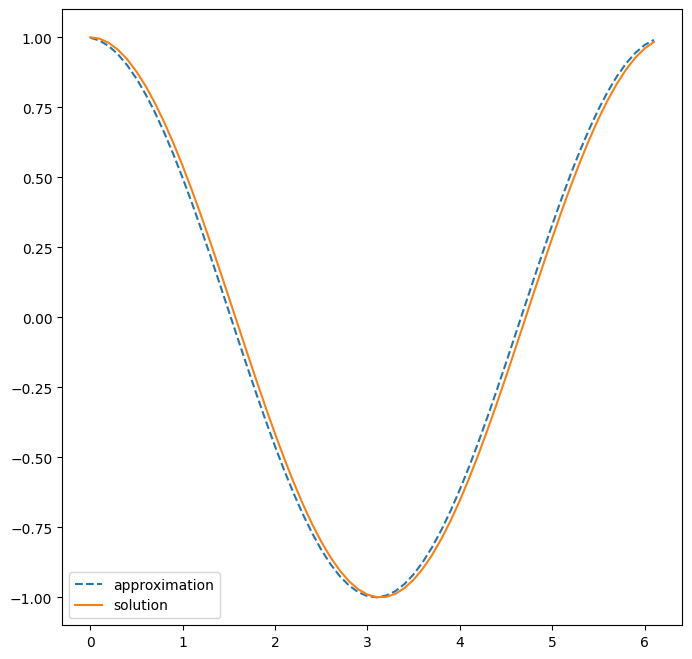

Error of approximation : 0.04997515074549317


In [17]:
import numpy as np
import matplotlib.pyplot as plt

#step size
h = 0.1
#make grid
x = np.arange(0, 2*np.pi, h)
#finds function
y = np.sin(x)

#calculates forward difference
forward = np.diff(y) / h
#finds result grid
x_diff = x[:-1:]
#finds solution
solution = np.cos(x_diff)

#Vizualization
plt.figure(figsize = (8, 8))
plt.plot(x_diff, forward, '--',label = 'approximation')
plt.plot(x_diff, solution, label = 'solution')
plt.legend()
plt.show()

#calculates error between solution and approximation
max_error = max(abs(solution - forward))
print(f"Error of approximation : {max_error}")

## 20.3 Approximating of Higher Order Derivatives

To approximate higher order derivates we can use Taylor series around a = xj, then computing it at x = xj-1 and xj+1 gives:

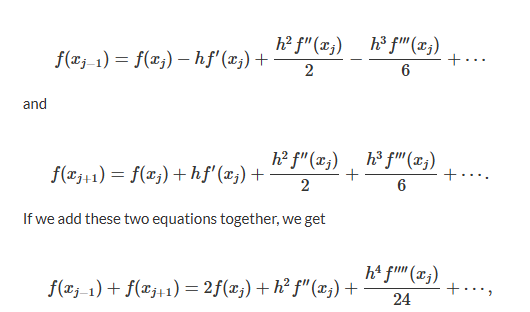

For second order equations, after simlpifying we see the equation

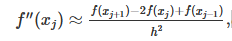

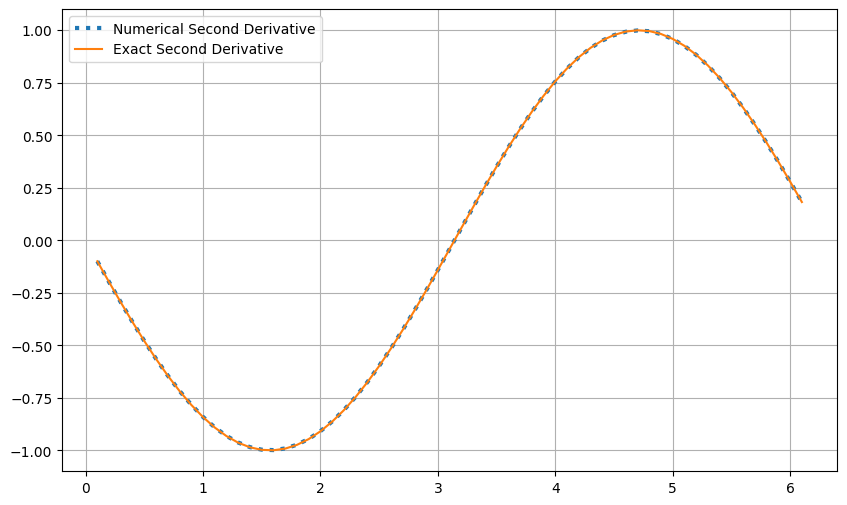

Error of approximation : 0.0008329916744438393


In [25]:
import numpy as np
import matplotlib.pyplot as plt

#define sin(x)
def f(x):
    return np.sin(x)

#finds exact second derivative
def exact_second_derivative(x):
    return -np.sin(x)

# Step size
h = 0.1
# Define the x-grid
x = np.arange(0, 2*np.pi, h)
#computes values
y = f(x)

#uses central difference for central derivative
second_derivative = (y[:-2] - 2 * y[1:-1] + y[2:]) / h**2
#adjust x vals to plot
x_second = x[1:-1]

#exact solution
exact_solution = exact_second_derivative(x_second)

#vizualization
plt.figure(figsize=(10, 6))
plt.plot(x_second, second_derivative, label="Numerical Second Derivative", linestyle="dotted", lw = 3)
plt.plot(x_second, exact_solution, label="Exact Second Derivative")
plt.legend()
plt.grid()
plt.show()

#calculates error between solution and approximation
max_error = max(abs(exact_solution - second_derivative))
print(f"Error of approximation : {max_error}")
